In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 20)
pd.set_option("display.expand_frame_repr", False)

pulls_one = pd.read_csv('Datasets/pulls_2011-2013.csv')
pulls_two = pd.read_csv('Datasets/pulls_2014-2018.csv')
pull_files = pd.read_csv('Datasets/pull_files.csv')

In [20]:
pulls = pd.concat([pulls_one, pulls_two])
pulls['date'] = pd.to_datetime(pulls['date'], utc=True, format="mixed")
df = pulls.merge(pull_files, on='pid')

In [25]:
df.head()

,pid,user,date,file
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check
3,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/junit/scala/reflect/internal/PrintersTest...
4,11161892,Ichoran,2013-12-31 16:55:47+00:00,src/library/scala/collection/mutable/ArrayOps....


<Axes: xlabel='year,month'>

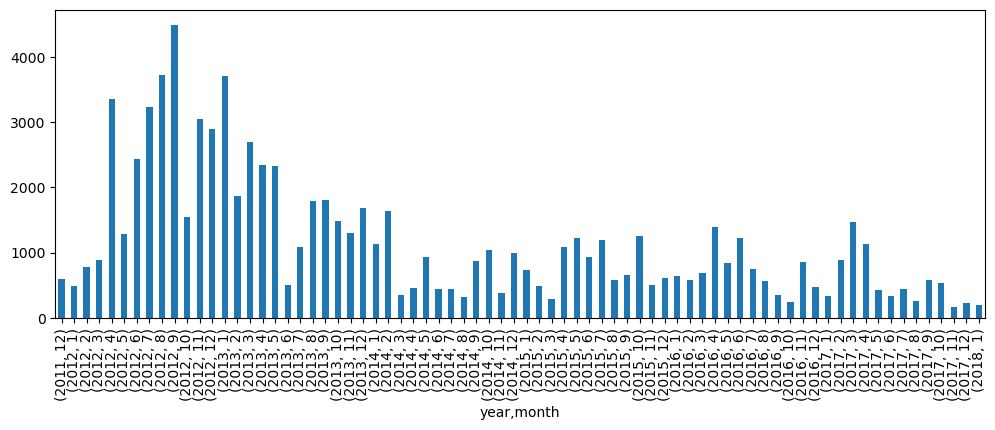

In [30]:
# The data used in this project was collected in January of 2018. We are interested in the evolution of the number of contributions up to that date

df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year

counts = df.groupby(["year", "month"])["pid"].count()
counts.plot(kind='bar', figsize = (12,4))


array([[<Axes: title={'center': 'pid'}>]], dtype=object)

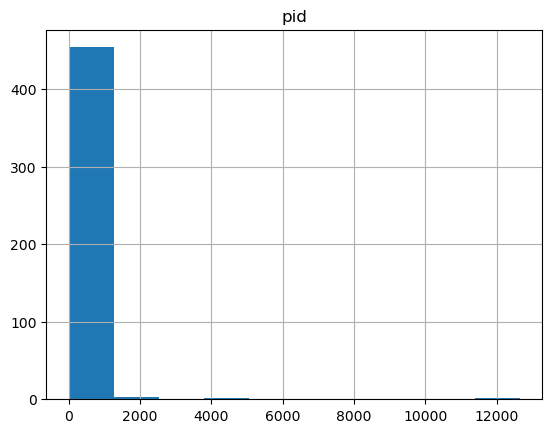

In [32]:
by_user = df.groupby('user').agg({'pid': 'count'})
by_user.hist()

In [42]:
last_10 = pulls.sort_values(by = 'date').tail(10)

joined_pr = pull_files.merge(last_10, on='pid')

files = set(joined_pr['file'])
files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

In [43]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

file_pr = df[df['file'] == file]

author_counts = file_pr.groupby('user').count()

author_counts.nlargest(3, 'file')

,pid,date,file,month,year
user,,,,,
xeno-by,11,11,11,11,11
retronym,5,5,5,5,5
soc,4,4,4,4,4


In [44]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

file_pr = pull_files[pull_files['file'] == file]

joined_pr = pulls.merge(file_pr, on='pid')

users_last_10 = set(joined_pr.nlargest(10, 'date')['user'])
users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

In [57]:
# The developers we are interested in
authors = ['xeno-by', 'soc']

by_author = pulls[pulls['user'].isin(authors)]

counts = by_author.groupby([by_author['user'], by_author['date'].dt.year]).agg({'pid': 'count'}).reset_index()

counts

,user,date,pid
0,soc,2011,12
1,soc,2012,44
2,soc,2013,117
3,soc,2014,20
4,soc,2015,24
5,soc,2016,21
6,xeno-by,2011,20
7,xeno-by,2012,271
8,xeno-by,2013,123
9,xeno-by,2014,60


In [60]:
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)

counts_wide

user,soc,xeno-by
date,,
2011,12,20
2012,44,271
2013,117,123
2014,20,60
2015,24,3
2016,21,0


<Axes: xlabel='date'>

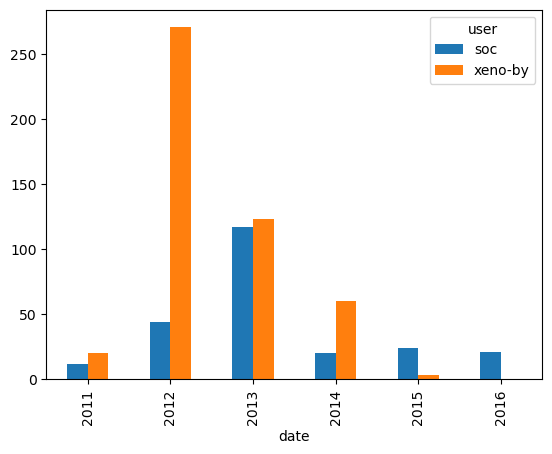

In [61]:
counts_wide.plot(kind='bar')

<Axes: xlabel='date'>

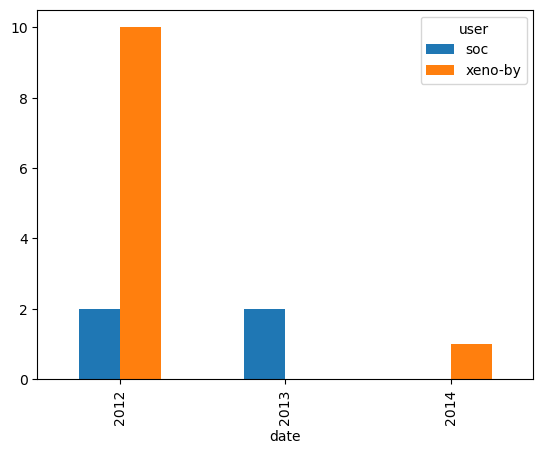

In [62]:
authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

by_author = df[df['user'].isin(authors)]

by_file = by_author[by_author['file'] == file]

grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()

by_file_wide = grouped.pivot_table(index='date', columns='user', values='pid', fill_value=0)

by_file_wide.plot(kind='bar')